In [1]:
import pandas as pd

#### loading the data saved from code1

In [2]:
p = r"all_segment_only_last_week_with12week_test_jan1_2025.csv"
df = pd.read_csv(p)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_2238           30          27        30              4   
2   seg_1499           30          27        30              4   
3   seg_2235           30          27        30              4   
4   seg_2236           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -1.260250                        1.0   
1            -3.840635                        5.0   
2            -3.851589                        0.0   
3            -3.962838                        5.0   
4            -4.033811                        2.0   

   crashcount_binary_sum_12wk_test  
0                                1  
1                                4  
2                                0  
3                                3  
4                                2

In [3]:
df['rank'] = df.groupby(['week_interval'])['cumulative_Prob_log'].rank(method = 'first', ascending=False)

In [4]:
len(df), len(df)/3140

(25120, 8.0)

In [5]:
week_start_list = list(set(df['week_start'].to_list()))
week_start_list

[1, 3, 7, 11, 15, 19, 23, 27]

In [6]:
week_end_list = list(set(df['week_end'].to_list()))
week_end_list

[30]

In [7]:
for a in week_start_list:
    df_filter = df[(df['week_start']==a) & (df['week_end']==30)] 
    df_filter = df_filter.sort_values(by = ['rank'], ascending = True)
    c = 30+1-a
    print(len(df_filter),"- length of df (should be 3140)")
    if len(df_filter)>0:
        
        df_filter.to_csv(f"all_week_combinations_2023/{a}_30_{c}_jan1_2025.csv", index = False)
    else:
        continue
    print("-----------------------------------------------------")

3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------
3140 - length of df (should be 3140)
-----------------------------------------------------


In [8]:
df_corr = pd.DataFrame()
all_corr = pd.DataFrame( columns = ['start_week', 'end_week', 'week_interval', 'correlation', 'st_error'])

In [9]:
train_start = [1,3,7,11,15,19,23,27]
train_week = [30,28,24,20,16,12,8,4]

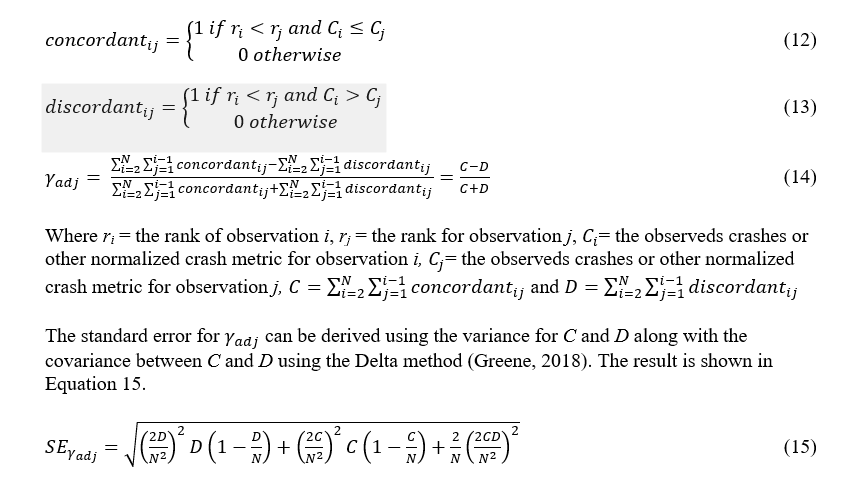

In [10]:
#math.sqrt((((2*D)/(N**2))**2)*D*(1-(D/N)) + (((2*C)/(N**2))**2)*C*(1-(C/N)) + (2/N)*(((2*C*D)/(N**2))**2))

In [11]:
for a,b in zip(train_start,train_week):

    p = r"all_week_combinations_2023/{0}_30_{1}_jan1_2025.csv".format(a,b)
    df = pd.read_csv(p)
    
    df['Num_concord'] = 0
    df['Num_discord'] = 0
    # Iterate through the DataFrame to compare rows
    for index, row in df.iterrows():
        current_value = row['crash_count_sum_12wk_test']
        df1 = df.loc[0:index-1]

        # Count values in 'A' column greater than or equal to the current value
        count_greater_equal = len(df1[df1['crash_count_sum_12wk_test'] >= current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_concord'] = count_greater_equal
    for index, row in df.iterrows():
        current_value = row['crash_count_sum_12wk_test']
        df1 = df.loc[0:index]

        # Count values in 'A' column greater than or equal to the current value
        count_less = len(df1[df1['crash_count_sum_12wk_test'] < current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_discord'] = count_less
        
    #calculating correlation    
    #corr = ((df['Num_concord'].sum()-df['Num_discord'].sum())/(df['Num_concord'].sum()+df['Num_discord'].sum()))
    C = df['Num_concord'].sum()
    D = df['Num_discord'].sum()
    N = C+D

    import math
    corr = (C-D)/(C+D)
    SE = math.sqrt((((2*D)/(N**2))**2)*D*(1-(D/N)) + (((2*C)/(N**2))**2)*C*(1-(C/N)) + (2/N)*(((2*C*D)/(N**2))**2))

  
    # Create a row as a dictionary
    df_corr_row = {'start_week': a, 'end_week': 30, 'week_interval': 30-a+1, 'correlation': corr, 'st_error': SE}

    # Append the row to 'all_corr' DataFrame
    all_corr = all_corr._append(df_corr_row, ignore_index=True)
    print("correlation for week", a,b, "is", corr)
    print("st error for week", a,b, "is", SE)



C:\Users\maroa\AppData\Local\Temp\ipykernel_19332\2342491400.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_corr = all_corr._append(df_corr_row, ignore_index=True)


correlation for week 1 30 is 0.8071019412649166
st error for week 1 30 is 0.00026595598664567956
correlation for week 3 28 is 0.8070345742792037
st error for week 3 28 is 0.0002659974651204737
correlation for week 7 24 is 0.8068340966229255
st error for week 7 24 is 0.0002661208423455977
correlation for week 11 20 is 0.8071774247549323
st error for week 11 20 is 0.0002659094989637785
correlation for week 15 16 is 0.8059424986252671
st error for week 15 16 is 0.0002666684844271505
correlation for week 19 12 is 0.8046389880342435
st error for week 19 12 is 0.0002674660302717297
correlation for week 23 8 is 0.8044969492089452
st error for week 23 8 is 0.0002675527144506523
correlation for week 27 4 is 0.8032859667669732
st error for week 27 4 is 0.00026829000209496593


In [12]:
# total 137 correlations
all_corr

start_week  end_week  week_interval  correlation  st_error
0         1.0      30.0           30.0     0.807102  0.000266
1         3.0      30.0           28.0     0.807035  0.000266
2         7.0      30.0           24.0     0.806834  0.000266
3        11.0      30.0           20.0     0.807177  0.000266
4        15.0      30.0           16.0     0.805942  0.000267
5        19.0      30.0           12.0     0.804639  0.000267
6        23.0      30.0            8.0     0.804497  0.000268
7        27.0      30.0            4.0     0.803286  0.000268

In [13]:
all_corr = all_corr.sort_values(by = ['correlation'], ascending = False)
all_corr

start_week  end_week  week_interval  correlation  st_error
3        11.0      30.0           20.0     0.807177  0.000266
0         1.0      30.0           30.0     0.807102  0.000266
1         3.0      30.0           28.0     0.807035  0.000266
2         7.0      30.0           24.0     0.806834  0.000266
4        15.0      30.0           16.0     0.805942  0.000267
5        19.0      30.0           12.0     0.804639  0.000267
6        23.0      30.0            8.0     0.804497  0.000268
7        27.0      30.0            4.0     0.803286  0.000268

In [14]:
all_corr.to_csv("correlation_lastweeks_8_combination_jan2_2025.csv", index = False)

### for binary crash count sum (added later)

In [15]:
import pandas as pd

In [16]:
df_corr = pd.DataFrame()
all_corr = pd.DataFrame( columns = ['start_week', 'end_week', 'week_interval', 'correlation', 'st_error'])

In [17]:
train_start = [1,3,7,11,15,19,23,27]
train_week = [30,28,24,20,16,12,8,4]

In [18]:
for a,b in zip(train_start,train_week):

    p = r"all_week_combinations_2023/{0}_30_{1}_jan1_2025.csv".format(a,b)
    df = pd.read_csv(p)
    
    df['Num_concord'] = 0
    df['Num_discord'] = 0
    # Iterate through the DataFrame to compare rows
    for index, row in df.iterrows():
        current_value = row['crashcount_binary_sum_12wk_test']
        df1 = df.loc[0:index-1]

        # Count values in 'A' column greater than or equal to the current value
        count_greater_equal = len(df1[df1['crashcount_binary_sum_12wk_test'] >= current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_concord'] = count_greater_equal
    for index, row in df.iterrows():
        current_value = row['crashcount_binary_sum_12wk_test']
        df1 = df.loc[0:index]

        # Count values in 'A' column greater than or equal to the current value
        count_less = len(df1[df1['crashcount_binary_sum_12wk_test'] < current_value])

        # Update the 'Count_Greater_Equal' column
        df.at[index, 'Num_discord'] = count_less
        
    #calculating correlation    
    #corr = ((df['Num_concord'].sum()-df['Num_discord'].sum())/(df['Num_concord'].sum()+df['Num_discord'].sum()))
    C = df['Num_concord'].sum()
    D = df['Num_discord'].sum()
    N = C+D

    import math
    corr = (C-D)/(C+D)
    SE = math.sqrt((((2*D)/(N**2))**2)*D*(1-(D/N)) + (((2*C)/(N**2))**2)*C*(1-(C/N)) + (2/N)*(((2*C*D)/(N**2))**2))

  
    # Create a row as a dictionary
    df_corr_row = {'start_week': a, 'end_week': 30, 'week_interval': 30-a+1, 'correlation': corr, 'st_error': SE}

    # Append the row to 'all_corr' DataFrame
    all_corr = all_corr._append(df_corr_row, ignore_index=True)
    print("correlation for week (binary sum)", a,b, "is", corr)
    print("st error for week", a,b, "is", SE)



C:\Users\maroa\AppData\Local\Temp\ipykernel_19332\2876897308.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_corr = all_corr._append(df_corr_row, ignore_index=True)


correlation for week (binary sum) 1 30 is 0.807534956769469
st error for week 1 30 is 0.00026568913768456383
correlation for week (binary sum) 3 28 is 0.8074627198811744
st error for week 3 28 is 0.0002657336827666544
correlation for week (binary sum) 7 24 is 0.8072516907693026
st error for week 7 24 is 0.00026586374890618416
correlation for week (binary sum) 11 20 is 0.8076307315202416
st error for week 11 20 is 0.0002656300602491382
correlation for week (binary sum) 15 16 is 0.8063933704392855
st error for week 15 16 is 0.00026639176392520553
correlation for week (binary sum) 19 12 is 0.805069568587505
st error for week 19 12 is 0.0002672029879212302
correlation for week (binary sum) 23 8 is 0.8049161666561828
st error for week 23 8 is 0.0002672967472291712
correlation for week (binary sum) 27 4 is 0.8038082638188558
st error for week 27 4 is 0.00026797239470166204


In [19]:
all_corr

start_week  end_week  week_interval  correlation  st_error
0         1.0      30.0           30.0     0.807535  0.000266
1         3.0      30.0           28.0     0.807463  0.000266
2         7.0      30.0           24.0     0.807252  0.000266
3        11.0      30.0           20.0     0.807631  0.000266
4        15.0      30.0           16.0     0.806393  0.000266
5        19.0      30.0           12.0     0.805070  0.000267
6        23.0      30.0            8.0     0.804916  0.000267
7        27.0      30.0            4.0     0.803808  0.000268

In [20]:
all_corr = all_corr.sort_values(by = ['correlation'], ascending = False)
all_corr

start_week  end_week  week_interval  correlation  st_error
3        11.0      30.0           20.0     0.807631  0.000266
0         1.0      30.0           30.0     0.807535  0.000266
1         3.0      30.0           28.0     0.807463  0.000266
2         7.0      30.0           24.0     0.807252  0.000266
4        15.0      30.0           16.0     0.806393  0.000266
5        19.0      30.0           12.0     0.805070  0.000267
6        23.0      30.0            8.0     0.804916  0.000267
7        27.0      30.0            4.0     0.803808  0.000268

In [21]:
all_corr.to_csv("correlation_lastweeks_8_combination_binary_sum_april21_2025.csv", index = False)